In [96]:
import pandas as pd 
import numpy as np 

from tensorflow import keras
import tensorflow as tf

import os

import soundfile as sf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [97]:
## RNN - Bidirectional LTSM (forward/backward)
### LTSM (Long Short Term Memory)

# model - Sequential()
# model.add(LTSM(128))
# model.add(Dense(n_class, softmax))

# memory = gated rnns (hidden state)

In [98]:
# get information for rnn from melspectogram

In [99]:
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/jazz/jazz_11.wav')

n_fft = 1024

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, win_length=n_fft, hop_length=256, n_mels=138)


In [100]:
y

array([ 0.09569635,  0.05452875, -0.09993939, ...,  0.43043715,
        0.40674227,  0.35309538], dtype=float32)

In [101]:
mel_spec.shape

(138, 2584)

In [102]:
melspec_df = pd.DataFrame(mel_spec)
melspec_df

,0,1,2,3,4,5,6,7,8,9,...,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583
0,2.767703,1.256610,0.049260,0.079844,0.047800,0.027204,0.035284,0.092751,0.033658,0.087867,...,0.066821,0.112373,0.127000,0.225233,0.270547,0.149527,0.105926,0.082157,0.079817,1.107983
1,4.696153,4.969336,2.131524,1.402394,0.878734,1.475588,1.581236,1.592683,0.904518,1.422567,...,2.809259,2.776026,3.165994,4.196388,4.126279,3.139761,2.830846,2.375498,1.580870,3.386095
2,5.517553,13.391010,7.683267,5.333868,6.163404,8.828700,8.149593,5.839573,5.867539,8.901573,...,8.614573,8.160959,10.255269,11.472978,10.042929,9.227638,8.505672,8.085925,5.223974,4.385552
3,3.681101,10.694141,4.861880,4.566051,7.481699,10.397968,7.687128,3.890436,7.126028,10.064021,...,4.475569,4.226038,5.670397,7.492643,4.342639,4.862250,4.193801,6.897908,3.152003,2.662466
4,1.652678,2.962504,0.863914,1.215395,1.189772,2.486511,1.016630,0.384880,3.052526,7.381747,...,4.130633,6.908177,8.801167,12.533276,3.853016,0.594749,0.351353,6.597492,9.335791,5.007697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.000345,0.001392,0.001363,0.001263,0.001285,0.000626,0.000540,0.000996,0.000806,0.000428,...,0.001135,0.000713,0.000415,0.000385,0.000429,0.000351,0.000300,0.000385,0.000294,0.000606
134,0.000702,0.000709,0.000378,0.000728,0.001342,0.000796,0.001150,0.001143,0.000840,0.000547,...,0.002144,0.001211,0.001178,0.002383,0.002864,0.001409,0.001358,0.000661,0.000309,0.000641
135,0.000264,0.000384,0.000154,0.000143,0.000291,0.000325,0.000540,0.000455,0.000186,0.000222,...,0.000733,0.000946,0.000888,0.000582,0.000756,0.000806,0.000608,0.000227,0.000158,0.000557
136,0.000329,0.000601,0.000341,0.000191,0.000166,0.000347,0.000510,0.000288,0.000122,0.000239,...,0.000141,0.000245,0.000205,0.000191,0.000301,0.000328,0.000204,0.000087,0.000072,0.000552


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

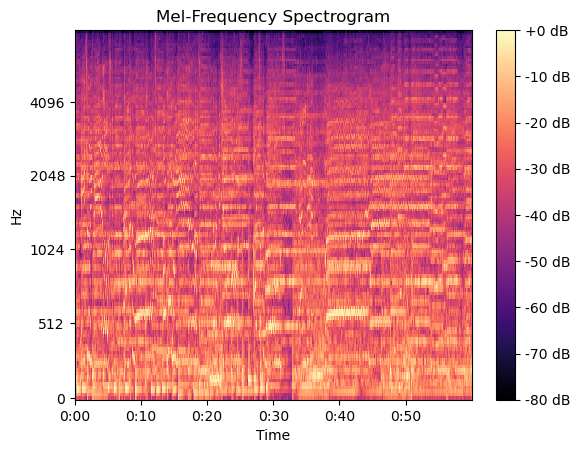

In [103]:
# Jazz Audio

J = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(J, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [104]:
# Rock Audio
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/rock/rock_40.wav')


[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

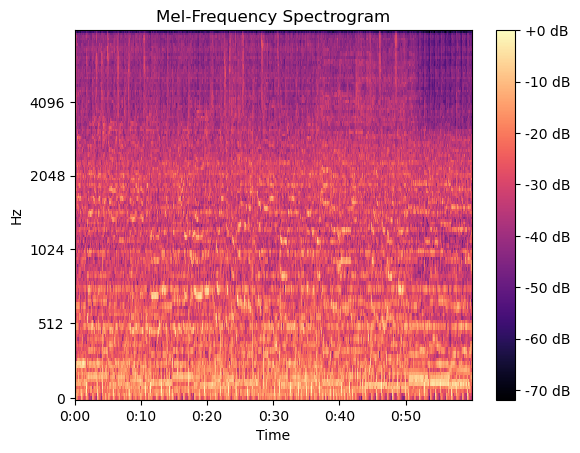

In [105]:
R = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 256, n_mels = 128)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(R, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [106]:
#Classical Audio 
y, sr = librosa.load('/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/classical/classical_33.wav')

[Text(0.5, 1.0, 'Mel-Frequency Spectrogram')]

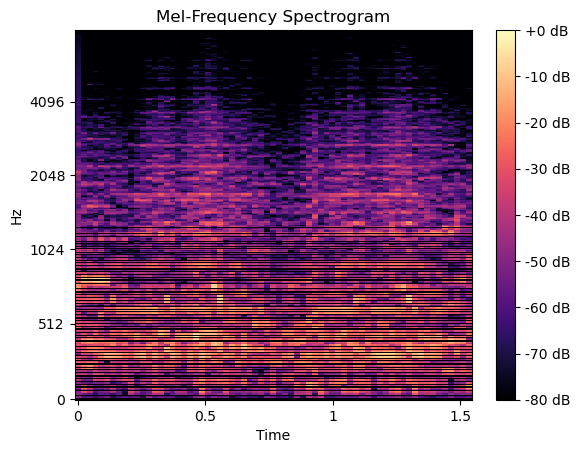

In [107]:
C = librosa.feature.melspectrogram(y=y, sr=sr, n_fft =1024, win_length = n_fft,
                                   hop_length = 10000, n_mels = 500)
fig, ax = plt.subplots()
s_db = librosa.power_to_db(C, ref = np.max)
img = librosa.display.specshow(s_db, x_axis = 'time',
                               y_axis= 'mel', sr=sr,
                               fmax = 8000, ax=ax)
fig.colorbar(img, ax=ax, format = '%+2.0f dB')
ax.set(title = 'Mel-Frequency Spectrogram')

In [108]:
def melspec_features(audio_path, sr = 22050, n_mels=128, hop_length =512, n_frames=5, n_fft = 2048):

    #loading audio file
    y, sr = librosa.load(audio_path)  
    #creating melspec feature
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft,
                                          hop_length = hop_length, n_mels = n_mels)
    #normalizing mel spectrogram
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    #pad/truncating to ensure all audio samples have the same length prior to running through the model
    mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, max(0, n_frames - mel_spectrogram.shape[1]))), 
                             mode='constant')
    mel_spectrogram = mel_spectrogram[:, :n_frames]
    
    return mel_spectrogram

In [109]:
def load_audio_files(data_dir, genres, n_mels=128, n_frames=5):

    all_mel_spectrograms = []
    all_labels = []

    for genre_index, genre in enumerate(genres):
        genre_dir = os.path.join(directory, genre)
        audio_files = os.listdir(genre_dir)

        for audio_file in audio_files:
            audio_path = os.path.join(genre_dir, audio_file)
            
            if os.path.isfile(audio_path) and audio_file.lower().endswith(('.wav')):
                mel_spectrogram = melspec_features(audio_path, n_mels=n_mels, n_frames=n_frames)


                all_mel_spectrograms.append(mel_spectrogram)
                all_labels.append(genre_index)


    all_mel_spectrograms = np.array(all_mel_spectrograms)
    all_labels = np.array(all_labels)

    return all_mel_spectrograms, all_labels

In [110]:
directory = '/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original'
genres = ['blues', 'classical', 'country', 'disco','hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']

all_mel_spectrograms, all_labels = load_audio_files(directory, genres)

In [111]:
all_mel_spectrograms

array([[[-30.601648 , -32.020508 , -34.697914 , -32.85947  ,
         -30.340633 ],
        [-24.576176 , -19.84051  , -15.306385 , -12.988326 ,
         -14.190882 ],
        [-22.581352 , -21.142567 , -13.187116 ,  -7.0595264,
          -6.6741276],
        ...,
        [-66.994835 , -64.7547   , -67.04358  , -68.47612  ,
         -66.89274  ],
        [-69.99003  , -68.249664 , -70.005875 , -69.788475 ,
         -68.09469  ],
        [-79.64288  , -78.00194  , -78.15001  , -80.       ,
         -79.28422  ]],

       [[-50.901333 , -54.279144 , -57.623062 , -59.765934 ,
         -58.99758  ],
        [-45.443222 , -45.971077 , -43.650604 , -44.917324 ,
         -46.49205  ],
        [-39.03938  , -39.090603 , -38.189415 , -34.835392 ,
         -37.261982 ],
        ...,
        [-80.       , -80.       , -80.       , -80.       ,
         -80.       ],
        [-80.       , -80.       , -80.       , -80.       ,
         -80.       ],
        [-80.       , -80.       , -80.       , 

In [112]:
all_labels

array([0, 0, 0, ..., 9, 9, 9])

In [113]:
reshaped_mel_spectrograms = [mel_spectrogram.ravel() for mel_spectrogram in all_mel_spectrograms]

spectrogram_series = [pd.Series(mel_spectrogram) for mel_spectrogram in reshaped_mel_spectrograms]

df = pd.concat([pd.DataFrame(spectrogram_series), pd.Series(all_labels, name='label')], axis=1)

In [114]:
df

,0,1,2,3,4,5,6,7,8,9,...,631,632,633,634,635,636,637,638,639,label
0,-30.601648,-32.020508,-34.697914,-32.859470,-30.340633,-24.576176,-19.840509,-15.306385,-12.988326,-14.190882,...,-68.249664,-70.005875,-69.788475,-68.094688,-79.642883,-78.001938,-78.150009,-80.000000,-79.284218,0
1,-50.901333,-54.279144,-57.623062,-59.765934,-58.997581,-45.443222,-45.971077,-43.650604,-44.917324,-46.492050,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,0
2,-46.493286,-49.239948,-48.575081,-45.840919,-40.953278,-42.654160,-43.031342,-41.118443,-29.624046,-27.811142,...,-74.660767,-65.093582,-59.693260,-58.474724,-80.000000,-80.000000,-73.482773,-67.247116,-65.157944,0
3,-26.907970,-30.061184,-25.626976,-26.773731,-25.552353,-21.158066,-12.834043,-9.952307,-14.550987,-19.367317,...,-67.405716,-65.763901,-65.596809,-64.381210,-77.607803,-77.524666,-77.423103,-76.425209,-75.837601,0
4,-25.007290,-30.625269,-39.161911,-37.387875,-35.595070,-18.593197,-15.695048,-16.003798,-16.535625,-15.879950,...,-77.693237,-80.000000,-80.000000,-80.000000,-77.753120,-80.000000,-80.000000,-80.000000,-80.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-24.198612,-25.432438,-34.934978,-41.825756,-38.754570,-18.998259,-20.354263,-20.395649,-19.805824,-18.077122,...,-46.266548,-45.048931,-45.541969,-47.526119,-59.790253,-55.516350,-57.010834,-59.275986,-61.107841,9
1728,-20.339462,-20.062702,-20.830725,-23.772800,-24.822109,-12.538597,-11.607710,-12.021364,-16.738167,-14.268583,...,-56.958965,-57.251678,-60.333405,-58.506199,-74.166153,-70.964920,-70.223465,-69.993790,-71.463287,9
1729,-31.658596,-34.357613,-30.561106,-25.747940,-28.248848,-30.139484,-29.340015,-27.127455,-19.420017,-18.067364,...,-79.348915,-80.000000,-80.000000,-80.000000,-73.545441,-79.641403,-80.000000,-80.000000,-80.000000,9
1730,-24.819950,-29.419468,-39.169540,-34.169342,-28.743298,-9.693829,-6.690594,-7.372183,-7.989397,-8.900009,...,-58.158710,-58.715096,-53.244682,-50.776115,-63.864052,-61.752243,-61.228004,-56.091820,-52.553848,9


In [115]:
df['label'].value_counts()

0    206
2    204
4    201
7    201
9    200
6    191
1    137
3    136
8    133
5    123
Name: label, dtype: int64

In [116]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .15, random_state = 42)

In [118]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_val_sc = scaler.transform(np.array(X_val, dtype = float))
X_test_sc = scaler.transform(np.array(X_test, dtype = float))

In [119]:
X_train_reshaped = X_train_sc.reshape((X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_reshaped = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])
X_val_reshaped = X_val_sc.reshape(X_val_sc.shape[0], 1, X_val_sc.shape[1])

In [120]:
X_train_sc.shape

(1177, 640)

In [121]:
X_train_reshaped.shape

(1177, 1, 640)

In [122]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1)),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [124]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_sc, y_train, epochs=250, batch_size=100, validation_data=(X_val_sc, y_val))

Epoch 1/250
12/12 [==============================] - 15s 1s/step - loss: 2.0825 - accuracy: 0.2107 - val_loss: 2.0374 - val_accuracy: 0.2404
Epoch 2/250
12/12 [==============================] - 13s 1s/step - loss: 2.0580 - accuracy: 0.2218 - val_loss: 2.0283 - val_accuracy: 0.2500
Epoch 3/250
12/12 [==============================] - 14s 1s/step - loss: 2.0628 - accuracy: 0.2268 - val_loss: 2.0133 - val_accuracy: 0.2548
Epoch 4/250
12/12 [==============================] - 16s 1s/step - loss: 2.0414 - accuracy: 0.2379 - val_loss: 2.0140 - val_accuracy: 0.2644
Epoch 5/250
12/12 [==============================] - 14s 1s/step - loss: 2.0342 - accuracy: 0.2370 - val_loss: 2.0127 - val_accuracy: 0.2692
Epoch 6/250
12/12 [==============================] - 14s 1s/step - loss: 2.0204 - accuracy: 0.2438 - val_loss: 1.9764 - val_accuracy: 0.2644
Epoch 7/250
12/12 [==============================] - 14s 1s/step - loss: 2.0415 - accuracy: 0.2285 - val_loss: 1.9890 - val_accuracy: 0.2885
Epoch 8/250
1

Epoch 59/250
12/12 [==============================] - 14s 1s/step - loss: 2.0159 - accuracy: 0.2404 - val_loss: 1.9772 - val_accuracy: 0.2500
Epoch 60/250
12/12 [==============================] - 14s 1s/step - loss: 2.0064 - accuracy: 0.2353 - val_loss: 1.9739 - val_accuracy: 0.2452
Epoch 61/250
12/12 [==============================] - 16s 1s/step - loss: 2.0120 - accuracy: 0.2472 - val_loss: 1.9886 - val_accuracy: 0.2596
Epoch 62/250
12/12 [==============================] - 13s 1s/step - loss: 2.0104 - accuracy: 0.2302 - val_loss: 1.9846 - val_accuracy: 0.2933
Epoch 63/250
12/12 [==============================] - 14s 1s/step - loss: 2.0000 - accuracy: 0.2404 - val_loss: 1.9748 - val_accuracy: 0.2837
Epoch 64/250
12/12 [==============================] - 14s 1s/step - loss: 1.9917 - accuracy: 0.2481 - val_loss: 2.0024 - val_accuracy: 0.2356
Epoch 65/250
12/12 [==============================] - 13s 1s/step - loss: 2.0500 - accuracy: 0.2260 - val_loss: 2.0090 - val_accuracy: 0.2452
Epoch 

12/12 [==============================] - 14s 1s/step - loss: 1.9839 - accuracy: 0.2804 - val_loss: 1.9797 - val_accuracy: 0.2837
Epoch 174/250
12/12 [==============================] - 13s 1s/step - loss: 1.9842 - accuracy: 0.2804 - val_loss: 1.9943 - val_accuracy: 0.2788
Epoch 175/250
12/12 [==============================] - 12s 1s/step - loss: 1.9777 - accuracy: 0.2838 - val_loss: 1.9895 - val_accuracy: 0.2692
Epoch 176/250
12/12 [==============================] - 12s 1s/step - loss: 1.9672 - accuracy: 0.2965 - val_loss: 1.9645 - val_accuracy: 0.3077
Epoch 177/250
12/12 [==============================] - 13s 1s/step - loss: 1.9935 - accuracy: 0.2702 - val_loss: 1.9393 - val_accuracy: 0.2885
Epoch 178/250
12/12 [==============================] - 13s 1s/step - loss: 1.9620 - accuracy: 0.2753 - val_loss: 1.9444 - val_accuracy: 0.2933
Epoch 179/250
12/12 [==============================] - 12s 1s/step - loss: 1.9560 - accuracy: 0.2557 - val_loss: 1.9437 - val_accuracy: 0.2644
Epoch 180/250

In [125]:
loss, accuracy = model.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")

37/37 [==============================] - 6s 171ms/step - loss: 1.7189 - accuracy: 0.3823
:loss: 1.718851923942566, accuracy: 0.38232794404029846


In [126]:
test_loss = model.evaluate(X_val_sc, y_val)

print(f'Test Loss: {test_loss}')

7/7 [==============================] - 1s 172ms/step - loss: 1.8041 - accuracy: 0.3317
Test Loss: [1.8040852546691895, 0.33173078298568726]


In [127]:
pred = model.predict(X_test_sc)

pred_labels = np.argmax(pred, axis=1)

correct_predictions = np.sum(pred_labels == y_test)

total_samples = len(y_test)

test_accuracy = correct_predictions / total_samples


print(f'Test Accuracy: {test_accuracy}')


11/11 [==============================] - 2s 165ms/step
Test Accuracy: 0.30547550432276654


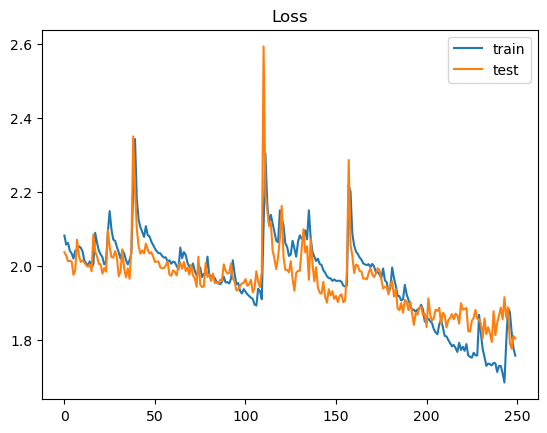

In [128]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

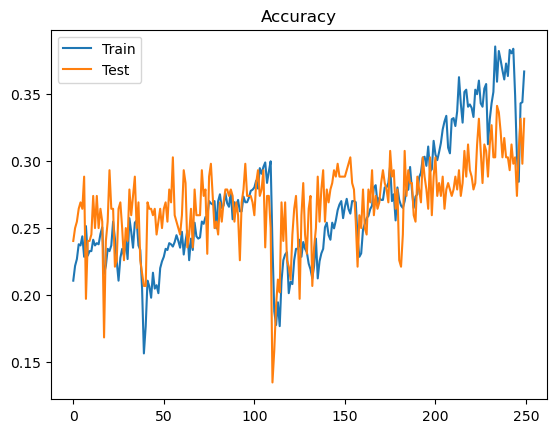

In [129]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()